In [1]:
def setup_environment(isDataExist: bool):
  !pip install kaggle

  from google.colab import drive
  drive.mount('/content/drive')

  import os
  import json
  f = open("/content/drive/MyDrive/kaggle/token/kaggle.json", 'r')
  json_data = json.load(f) 
  os.environ['KAGGLE_USERNAME'] = json_data['username']
  os.environ['KAGGLE_KEY'] = json_data['key']

  if(isDataExist is False):
    !kaggle competitions download -c digit-recognizer -p /content/drive/MyDrive/kaggle/digit_recognizer/dataset

    !unzip -o /content/drive/MyDrive/kaggle/digit_recognizer/dataset/digit-recognizer.zip -d /content/drive/MyDrive/kaggle/digit_recognizer/dataset
    !rm /content/drive/MyDrive/kaggle/digit_recognizer/dataset/digit-recognizer.zip
        
# setup_environment(isDataExist=False)
setup_environment(isDataExist=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive


# Import library

In [2]:
# The following article is referenced in this notebook.
# https://github.com/kaledhoshme123/Digit-Recognizer-CNN-acc-99.8-

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# keras
from keras.layers import Dense, Input, Dropout, Activation, MaxPooling2D, GlobalAveragePooling2D, Conv2D, concatenate
from keras.utils import np_utils
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.callbacks import EarlyStopping

In [3]:
train = pd.read_csv('/content/drive/MyDrive/kaggle/digit_recognizer/dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/kaggle/digit_recognizer/dataset/test.csv')

In [4]:
shape = (28, 28, 1)
batch_size = 128

# Check basic infromation

In [5]:
# check null: no null data!
display(train.info()) 
display(test.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


None

In [6]:
display(train.head())
display(train.tail())
display(test.head())
display(test.tail())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_x = train.drop(['label'], axis=1)
train_y = train['label']

In [8]:
display(train_x)
display(train_y)

train_x = np.asarray(train_x)
display(train_x.shape)

train_x = train_x.reshape((42000, 28, 28))
display(train_x.shape)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

(42000, 784)

(42000, 28, 28)

In [9]:
train_y = np_utils.to_categorical(train_y)

In [10]:
display(train_y)

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

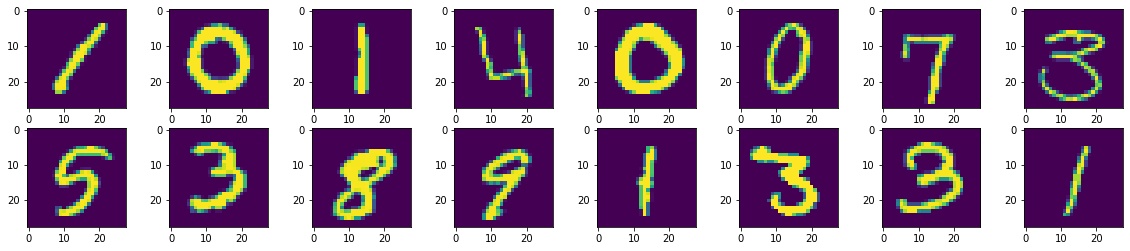

In [11]:
plt.figure(figsize = (20, 4))
for i in range(16):
  plt.subplot(2, 8, i + 1)
  plt.imshow(train_x[i])
plt.show()

In [12]:
def create_model():
  left_input = Input(shape = shape)
  filter = 32
  x = left_input
  for i in range(3):
    x = Conv2D(filter,3, activation = "relu", padding = 'same')(x)
    x = Dropout(0.4)(x)
    x = MaxPooling2D()(x)
    filter*=2
  right_input = Input(shape = shape)
  y = right_input
  filter = 32
  for i in range(3):
    y = Conv2D(filter,3, activation = "relu", padding = 'same', dilation_rate = 2)(y)
    y = Dropout(0.4)(y)
    y = MaxPooling2D()(y)
    filter*=2
  x = GlobalAveragePooling2D()(x)
  y = GlobalAveragePooling2D()(y)
  m = concatenate([x, y])
  m = Dropout(0.4)(m)
  output = Dense(10, activation = "softmax")(m)
  m = Model([left_input, right_input], output)
  return m

In [13]:
model = create_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 28, 28, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 28, 28, 32)   320         ['input_2[0][0]']                
                                                                                              

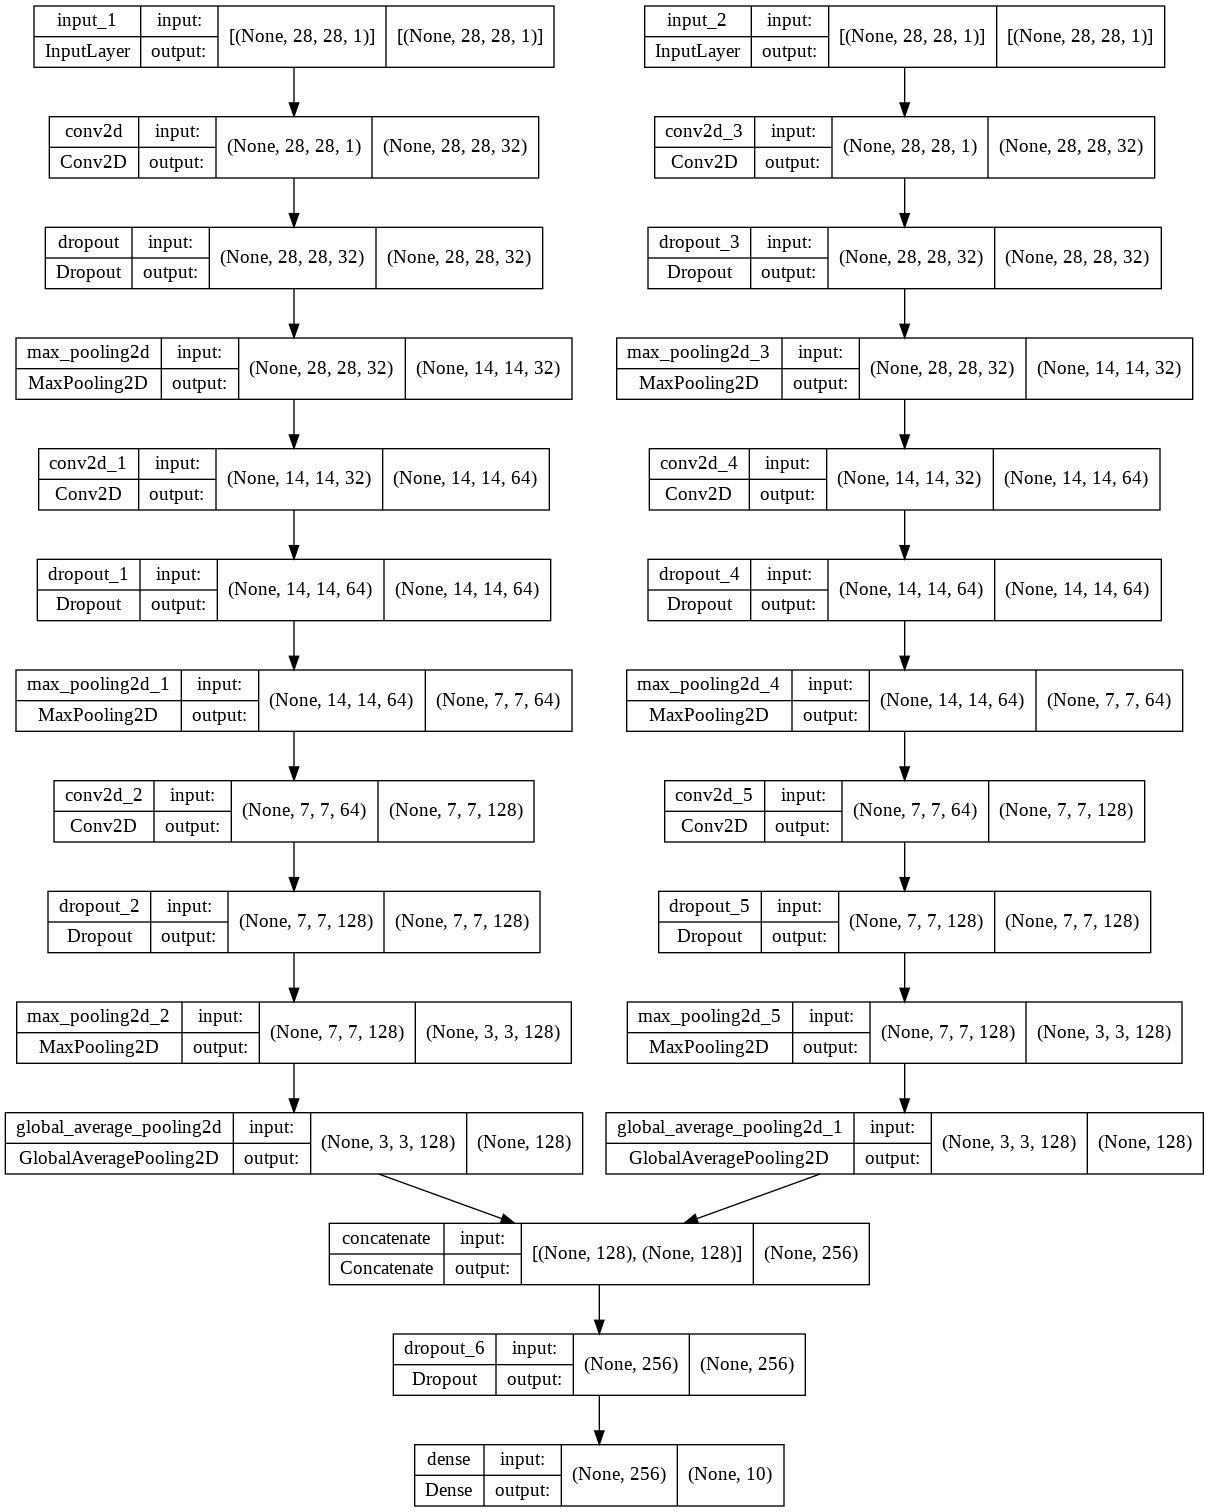

In [14]:
plot_model(model, show_shapes = True)

In [15]:
model.compile(optimizer=Adam(learning_rate=0.001), loss= "categorical_crossentropy", metrics = ['accuracy'])

In [18]:
isNeedToTrain = False

if (isNeedToTrain):
  # reccomend: bach_size=128, epochs=160
  history = model.fit([train_x, train_x], train_y, batch_size=32, epochs=20, verbose=True,
                  validation_split = 0.2,
                  callbacks = [EarlyStopping(patience= 20, monitor='val_loss', mode = 'min', restore_best_weights=True)])
  model.save('/content/drive/MyDrive/kaggle/digit_recognizer/model/digit-classification.h5')
else:
  from tensorflow.python.keras.models import load_model
  model = load_model('/content/drive/MyDrive/kaggle/digit_recognizer/model/digit-classification.h5')
  model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 28, 28, 32)   320         input_2[0][0]                    
______________________________________________________________________________________________

# Result

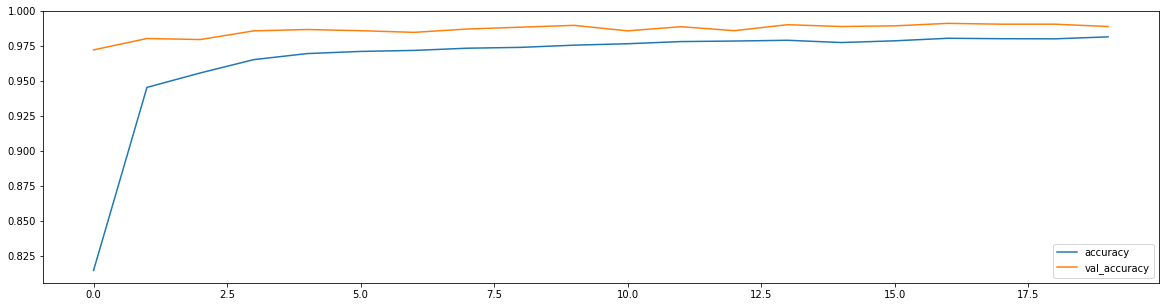

In [19]:
# plot accuracy
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 5))
plt.plot(history.history['accuracy'], label = "accuracy")
plt.plot(history.history['val_accuracy'], label = "val_accuracy")
plt.legend()

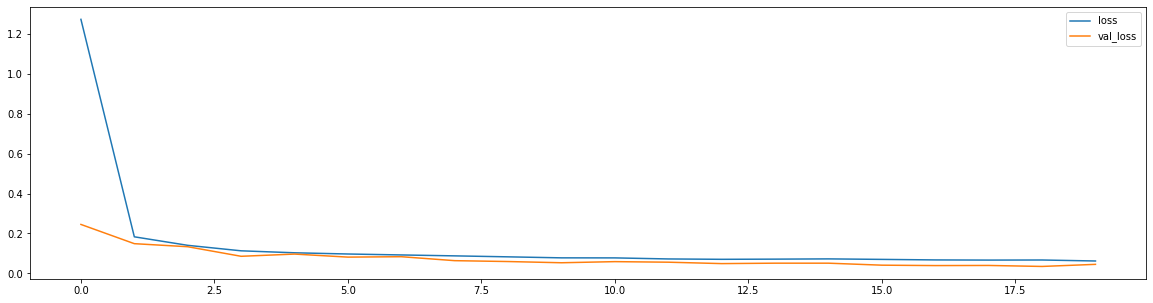

In [20]:
# plot loss
plt.figure(figsize = (20, 5))
plt.plot(history.history['loss'], label = "loss")
plt.plot(history.history['val_loss'], label= "val_loss")
plt.legend()

# Evaluation

In [21]:
model.evaluate([train_x, train_x], train_y, batch_size= 128)

329/329 [==============================] - 2s 6ms/step - loss: 0.0327 - accuracy: 0.9931


[0.03272603452205658, 0.9931190609931946]

In [22]:
test_x = np.asarray(test)
test_x.shape
test_x = test_x.reshape(test_x.shape[0], 28, 28)
test_y = model.predict([test_x, test_x])

In [24]:
test_y = np.argmax(test_y, axis=1)

In [29]:
submission = pd.DataFrame({'ImageId': range(1, len(test_y)+1),
                           'Label': test_y})

display(submission)
submission.to_csv("/content/drive/MyDrive/kaggle/digit_recognizer/dataset/digit_recognizer_submission.csv", index=False)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [30]:
!kaggle competitions submit -c digit-recognizer -f "/content/drive/MyDrive/kaggle/digit_recognizer/dataset/digit_recognizer_submission.csv" -m "digit recognizer submission"

100% 208k/208k [00:03<00:00, 57.0kB/s]
Successfully submitted to Digit Recognizer